In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading Cancer data

In [2]:
import pickle
file = open("data_risk2_dummy","rb")
X_train = pickle.load(file)
y_train = pickle.load(file)
X_test = pickle.load(file)
y_test = pickle.load(file)
file.close()

In [3]:
y_train.shape

(113829,)

In [4]:
y_test.shape

(59501,)

In [5]:
col=X_train.columns
col

Index(['menopaus_0', 'menopaus_1', 'agegrp_2', 'agegrp_3', 'agegrp_4',
       'agegrp_5', 'agegrp_6', 'agegrp_7', 'agegrp_8', 'agegrp_9', 'agegrp_10',
       'density_1', 'density_2', 'density_3', 'density_4', 'race_1', 'race_2',
       'race_3', 'race_4', 'race_5', 'hispanic_0', 'hispanic_1', 'bmi_1',
       'bmi_2', 'bmi_3', 'bmi_4', 'agefirst_0', 'agefirst_1', 'agefirst_2',
       'nrelbc_0', 'nrelbc_1', 'nrelbc_2', 'brstproc_0', 'brstproc_1',
       'lastmamm_0', 'lastmamm_1', 'surgmeno_0', 'surgmeno_1', 'hrt_0',
       'hrt_1'],
      dtype='object')

In [6]:
col=col.drop(['menopaus_0', 'menopaus_1','race_1', 'race_2','race_3', 'race_4', 'race_5', 'hispanic_0', 'hispanic_1', 
             'bmi_1','bmi_2', 'bmi_3', 'bmi_4', 'agefirst_0', 'agefirst_1', 'agefirst_2','lastmamm_0', 'lastmamm_1', 
             'surgmeno_0', 'surgmeno_1', 'hrt_0','hrt_1'])

In [7]:
col

Index(['agegrp_2', 'agegrp_3', 'agegrp_4', 'agegrp_5', 'agegrp_6', 'agegrp_7',
       'agegrp_8', 'agegrp_9', 'agegrp_10', 'density_1', 'density_2',
       'density_3', 'density_4', 'nrelbc_0', 'nrelbc_1', 'nrelbc_2',
       'brstproc_0', 'brstproc_1'],
      dtype='object')

In [8]:
X_train=X_train[col]
X_test=X_test[col]

In [9]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, classification_report

In [10]:
def model_stats(X, y, y_pred, model):

    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix ->")
    print(cm)

    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    
    print("Accuracy:",accuracy_score(y, y_pred))

    # Let's see the sensitivity of our model
    print("Sensitivity:",TP / float(TP+FN))

    # Let us calculate specificity
    print("Specificity:",TN / float(TN+FP))

    # Let us calculate precision
    print("Precision",TP / float(TP+FP))
    print("MCC ", metrics.matthews_corrcoef(y, y_pred))
    print("F1 ", metrics.fbeta_score(y, y_pred, beta = 1))
    print("F2 ", metrics.fbeta_score(y, y_pred, beta = 2))
    print("F3 ", metrics.fbeta_score(y, y_pred, beta = 3))
    
    print("Classification report")
    print(metrics.classification_report(y, y_pred))
    
    # Predicting probability for roc_auc
    pred_probs = model.predict_proba(X)[:,1]
    print("ROC-AUC : {:2.3}".format(roc_auc_score(y, pred_probs)))

    # Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y, pred_probs, drop_intermediate = False )
    auc_score = roc_auc_score(y, pred_probs)
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

## Model building on unsampled data with default parameters

In [11]:
### 2: Model Building

# Importing LogisticRegression and metrics from sklearn library
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [12]:
# Running KNN classifier on default values
knn = KNeighborsClassifier(n_neighbors=300)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=300)

Confusion Matrix ->
[[109536      0]
 [  4293      0]]
Accuracy: 0.9622855335635031
Sensitivity: 0.0
Specificity: 1.0
Precision nan
MCC  0.0
F1  0.0
F2  0.0
F3  0.0
Classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    109536
           1       0.00      0.00      0.00      4293

    accuracy                           0.96    113829
   macro avg       0.48      0.50      0.49    113829
weighted avg       0.93      0.96      0.94    113829

ROC-AUC : 0.625


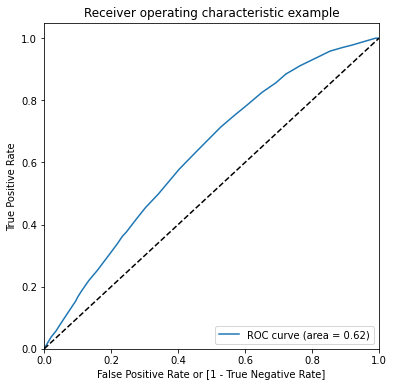

In [13]:
#predicting the train data
y_pred_train=knn.predict(X_train)

model_stats(X_train, y_train, y_pred_train, knn)

Confusion Matrix ->
[[57930     0]
 [ 1571     0]]
Accuracy: 0.9735970824019764
Sensitivity: 0.0
Specificity: 1.0
Precision nan
MCC  0.0
F1  0.0
F2  0.0
F3  0.0
Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     57930
           1       0.00      0.00      0.00      1571

    accuracy                           0.97     59501
   macro avg       0.49      0.50      0.49     59501
weighted avg       0.95      0.97      0.96     59501

ROC-AUC : 0.604


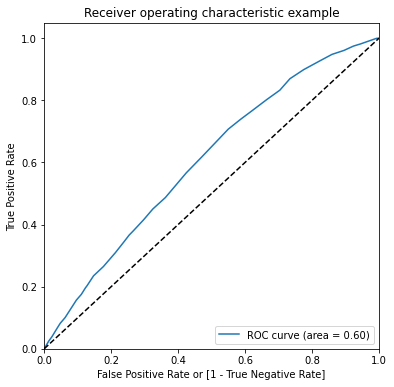

In [14]:
# predicting on the test data
y_pred_test=knn.predict(X_test)

model_stats(X_test, y_test, y_pred_test, knn)

In [15]:
### Building model using regularization and cross validation

# Create a cross validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [16]:
### Building model using regularization and cross validation

# Specify range of hyper-parameters to tune
hyper_params = {'n_neighbors': range(2500, 8400, 1000),
                'leaf_size': range(20, 60, 10)}

# Specify model for logistic regression with option to treat class imbalance and perform grid search
knn = KNeighborsClassifier()

# GridSearchCV
model_cv = GridSearchCV(estimator = knn,
                       param_grid = hyper_params,
                       scoring = "balanced_accuracy",
                       cv = folds,
                       verbose = 1,
                       return_train_score = True,
                       n_jobs=-1)

# Fit the model
model_cv.fit(X_train,y_train)

# printing the optimal accuracy score and hyperparameters
print("best balanced accuracy", model_cv.best_score_)
print("\n")
print(model_cv.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MemoryError: Unable to allocate 1.70 GiB for an array with shape (91063, 2500) and data type float64

In [104]:
y_pred_train=model_cv.predict(X_train)

Confusion Matrix ->
[[400737 284185]
 [  1776   3325]]
Accuracy: 0.5855775821965354
Sensitivity: 0.651832973926681
Specificity: 0.5850841409678766
Precision 0.011564815136864805
MCC  0.041165009703773445
F1  0.022726418350643006
F2  0.05399234851289646
F3  0.09972437083669497
ROC-AUC : 0.66


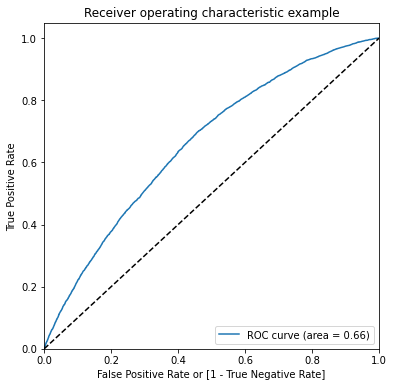

In [105]:
model_stats(X_train, y_train, y_pred_train, model_cv)

Confusion Matrix ->
[[133889  94324]
 [   602   1082]]
Accuracy: 0.5870933505004415
Sensitivity: 0.6425178147268409
Specificity: 0.5866843694268075
Precision 0.011341005806762677
MCC  0.039666650541585066
F1  0.022288598207848388
F2  0.05296547943059662
F3  0.09786364211935385
ROC-AUC : 0.65


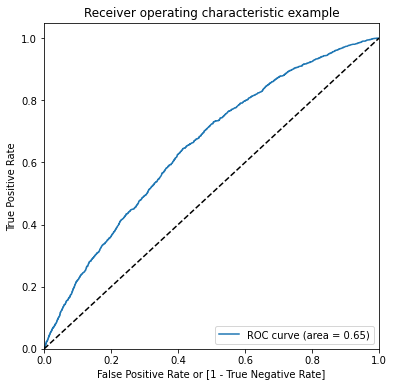

In [106]:
# Running Logistic Regression with class_weight parameter to handle class imbalance
y_pred_test=model_cv.predict(X_test)

model_stats(X_test, y_test, y_pred_test, model_cv)